# Module 4: Model Development

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# path of data 
data = pd.read_csv("../Data/clean.csv")
data.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Linear regression

One example of a Data  Model that we will be using is 
 **Simple Linear Regression**.
Simple Linear Regression is a method to help us understand the relationship between two variables:
- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict)(Y)


The result of Linear Regression is a **linear function** that predicts the response (dependent) variable as a function of the predictor (independent) variable. 



In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
#Creating linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [6]:
X = data[['highway-mpg']]
Y = data['price']

In [7]:
#Fitting the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
#Output the prediction
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [9]:
#Finding the value of the intercept
lm.intercept_

38423.3058581574

In [10]:
#Finding te slope
lm.coef_

array([-821.73337832])

####  Multiple Linear Regression

 What if we want to predict car price using more than one variable? 

If we want to use more variables in our model to predict car price, we can use **Multiple Linear Regression**.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and *two or more* predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We illustrate the structure by using four predictor variables, but these results can generalize to any integer :


From the previous section  we know that other good predictors of price could be: 
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

Let's develop a model using these variables as the predictor variables.

In [11]:
Z = data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [12]:
 lm.fit(Z, data['price'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
lm.intercept_

-15806.624626329223

In [14]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2a): </h1>
Create and train a  Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is  'normalized-losses' and  'highway-mpg'.
<b> ?</b>
</div>

Double-click __here__ for the solution.

<!-- Your answer is below:

lm2 = LinearRegression()
lm2.fit(data[['normalized-losses' , 'highway-mpg']],data['price'])

-->

In [15]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0, 48265.16669918154)

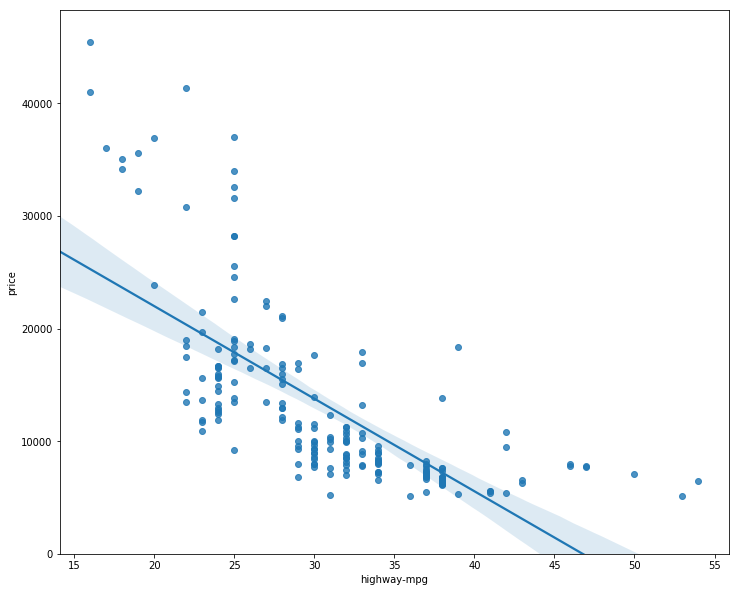

In [16]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=data)
plt.ylim(0,)

### Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

What is a **residual**?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a **residual plot**?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are **randomly spread out around the x-axis**, then a **linear model is appropriate** for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

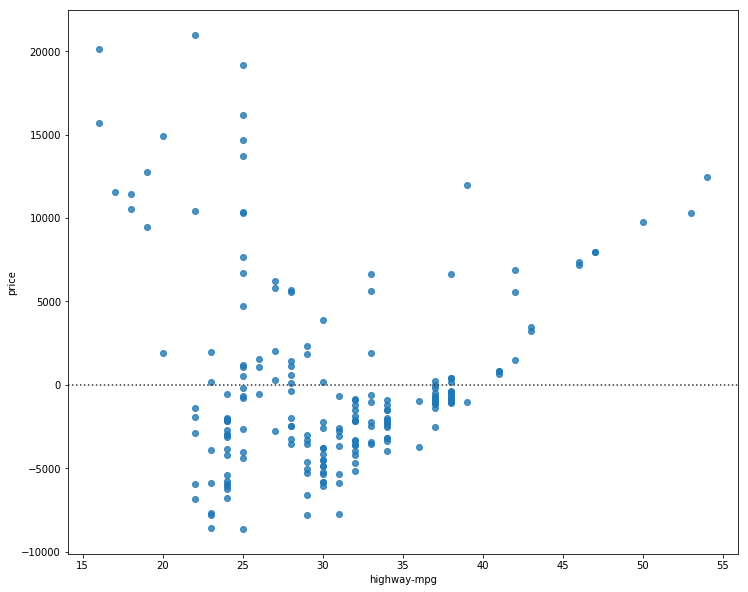

In [17]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data['highway-mpg'], data['price'])
plt.show()

How do we visualise a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualise it with regression or residual plot. 

One way to look at the fit of the model is by looking at the **distribution plot**: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [18]:
Y_hat = lm.predict(Z)

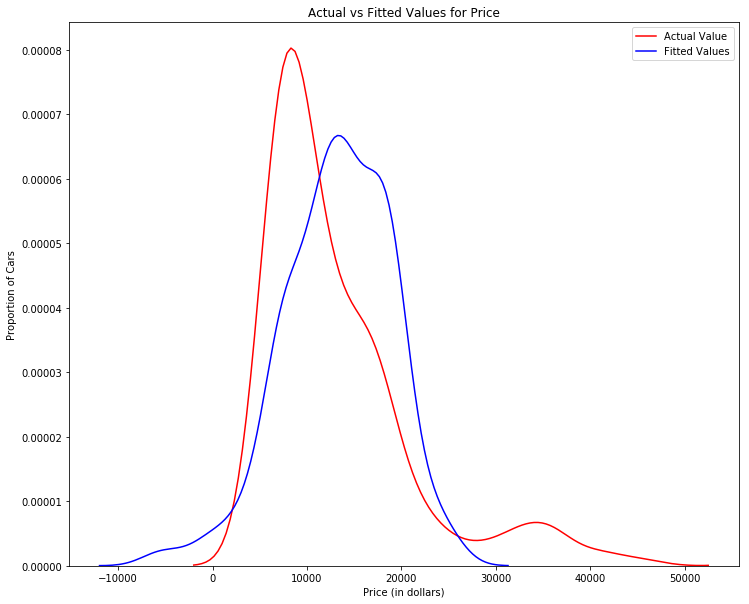

In [19]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(data['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

**Polynomial regression** is a particular case of the general linear regression model or multiple linear regression models. 
We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:

In [20]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    
print("done")

done


In [21]:
x = data['highway-mpg']
y = data['price']
print("done")

done


Let's fit the polynomial using the function **polyfit**, then use the function **poly1d** to display the polynomial function.

In [22]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


AttributeError: 'AxesSubplot' object has no attribute 'set_axis_bgcolor'

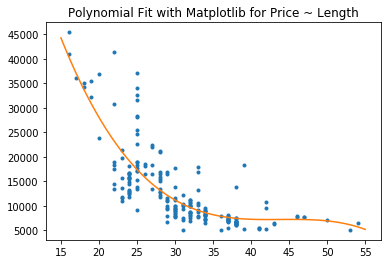

In [23]:
PlotPolly(p,x,y, 'highway-mpg')

 We can perform a polynomial transform on multiple features. First, we import the  module:

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [26]:
Z_pr=pr.fit_transform(Z)

In [27]:
Z.shape

(201, 4)

In [28]:
Z_pr.shape

(201, 15)

Data Pipelines simplify the steps of processing the data. We use the module  **Pipeline** to create a pipeline. We also use **StandardScaler** as a step in our pipeline.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [30]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [31]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [32]:
pipe.fit(Z,y)

C:\Users\0x6f736f646f\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\0x6f736f646f\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [33]:
ypipe=pipe.predict(Z)
ypipe[0:4]

C:\Users\0x6f736f646f\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [34]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.4965911884339176